In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import random
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Conv2D, Dense,Dropout, MaxPooling2D, BatchNormalization,Flatten
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_data = "C:/Training/"
test_data = "C:/Test/"

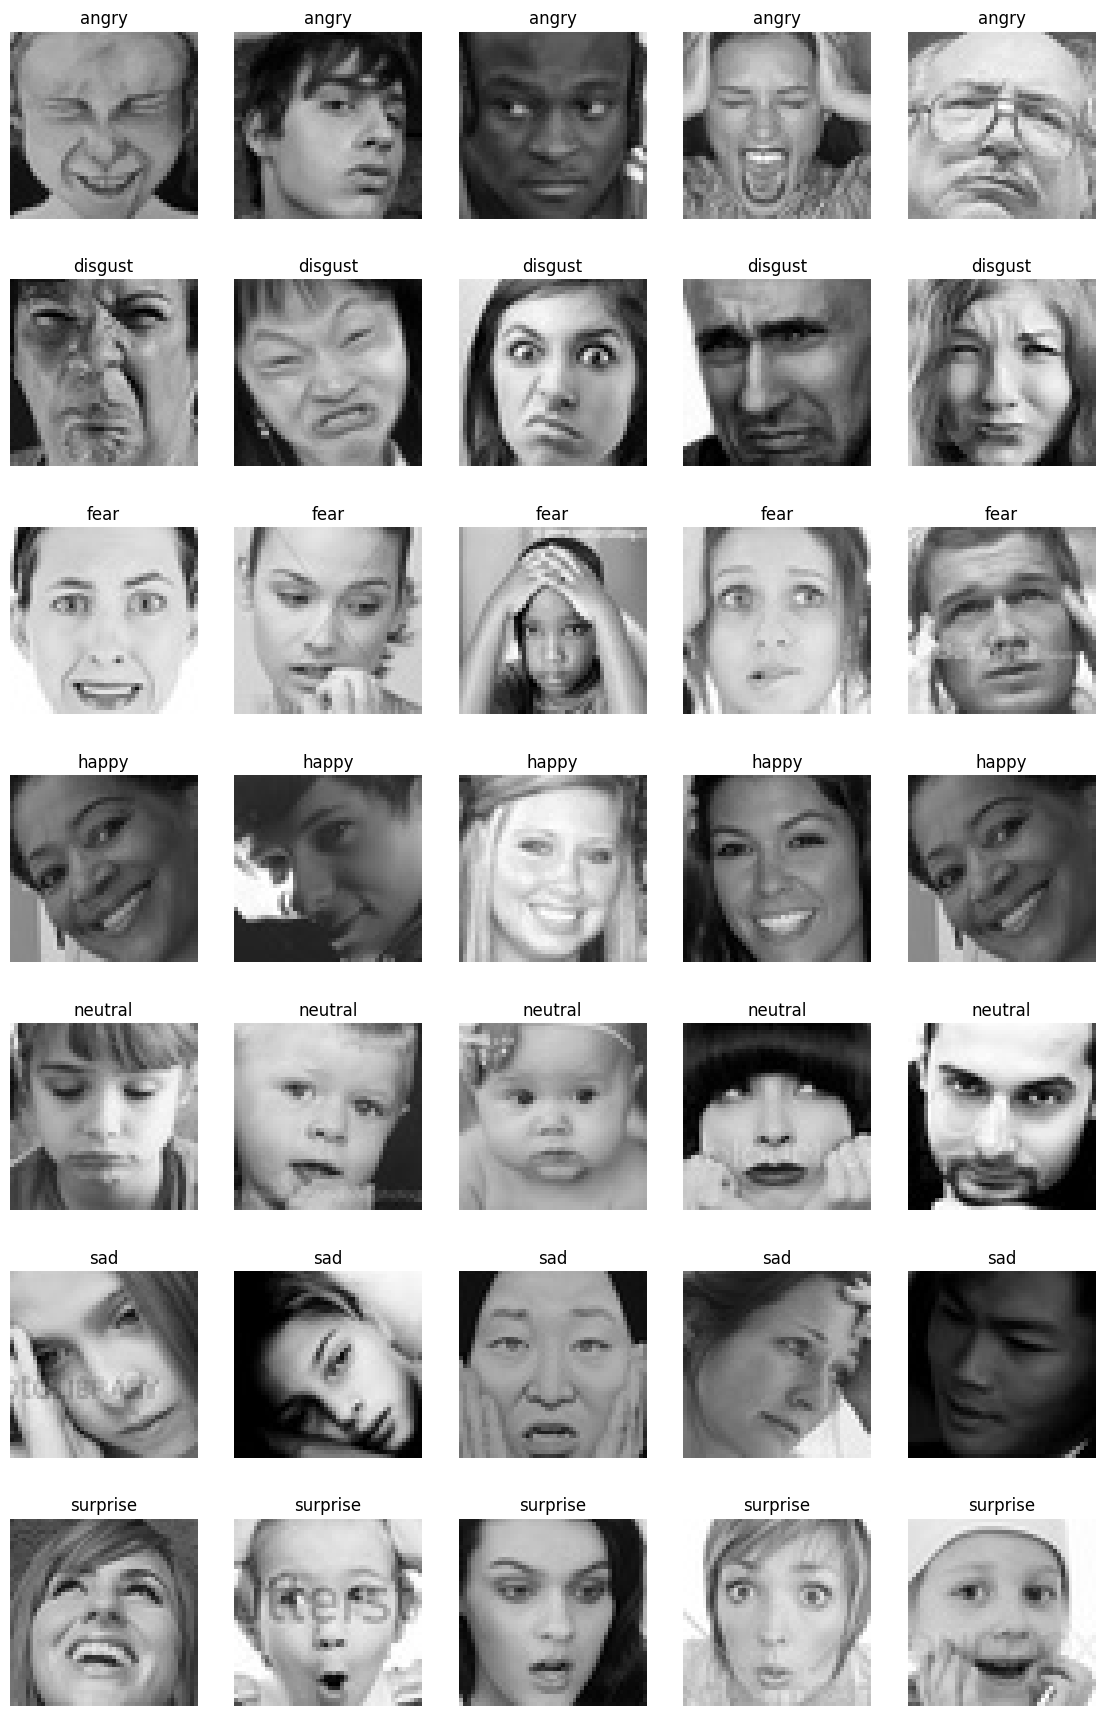

In [3]:
plt.figure(figsize=(14,22))
i = 1
for expression in os.listdir(train_data):
    for j in range(5):
        img = cv2.imread((train_data + expression +'/'+ os.listdir(train_data + expression)[random.randint(0,111)]))
        plt.subplot(7, 5, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
        plt.title(expression)
        plt.axis('off')
        i += 1
plt.show()

In [4]:
def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_data, 'train')
test_count = count_exp(test_data, 'test')
print(train_count)
print(test_count)

       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    939      111  1024   1774     1233  1247       831


<AxesSubplot: >

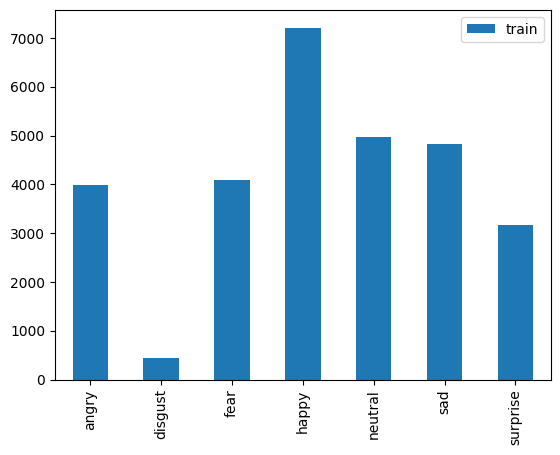

In [5]:
train_count.transpose().plot(kind='bar')

<AxesSubplot: >

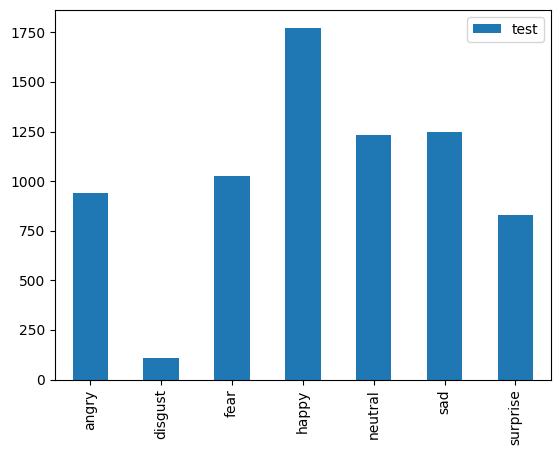

In [6]:
test_count.transpose().plot(kind='bar')

In [6]:
#Data Augmentation
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory(train_data,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory(test_data,
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7159 images belonging to 7 classes.


In [7]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [9]:
train_sample=next(train_generator)
print(train_sample[0].shape)

(64, 48, 48, 1)


In [10]:

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same',activation='relu', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3),activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
emotion_model_info = model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
449/449 [==============================] - 1070s 2s/step - loss: 1.9221 - accuracy: 0.2917 - val_loss: 1.6719 - val_accuracy: 0.3727
Epoch 2/25
449/449 [==============================] - 1021s 2s/step - loss: 1.4842 - accuracy: 0.4346 - val_loss: 1.6011 - val_accuracy: 0.4107
Epoch 3/25
449/449 [==============================] - 1019s 2s/step - loss: 1.3062 - accuracy: 0.5029 - val_loss: 1.3986 - val_accuracy: 0.4758
Epoch 4/25
449/449 [==============================] - 1017s 2s/step - loss: 1.2202 - accuracy: 0.5354 - val_loss: 1.2162 - val_accuracy: 0.5240
Epoch 5/25
449/449 [==============================] - 991s 2s/step - loss: 1.1575 - accuracy: 0.5597 - val_loss: 1.2386 - val_accuracy: 0.5223
Epoch 6/25
449/449 [==============================] - 993s 2s/step - loss: 1.1149 - accuracy: 0.5797 - val_loss: 1.1801 - val_accuracy: 0.5593
Epoch 7/25
449/449 [==============================] - 994s 2s/step - loss: 1.0754 - accuracy: 0.5919 - val_loss: 1.0788 - val_accuracy: 0.

In [20]:
print(emotion_model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


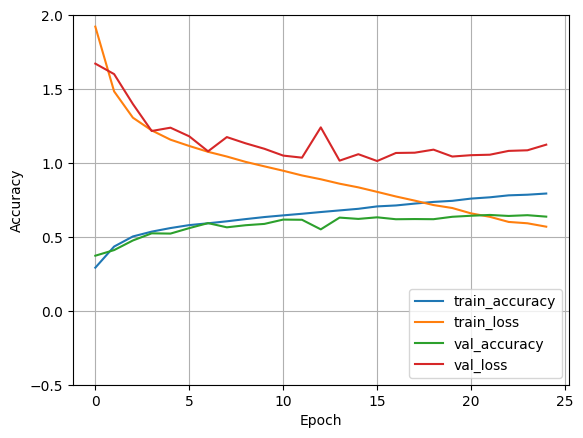

In [25]:
plt.grid()
plt.plot(emotion_model_info.history['accuracy'], label='train_accuracy')
plt.plot(emotion_model_info.history['loss'], label = 'train_loss')
plt.plot(emotion_model_info.history['val_accuracy'], label='val_accuracy')
plt.plot(emotion_model_info.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 2])
plt.legend(loc='lower right')
plt.show()

In [26]:
hist = emotion_model_info.history

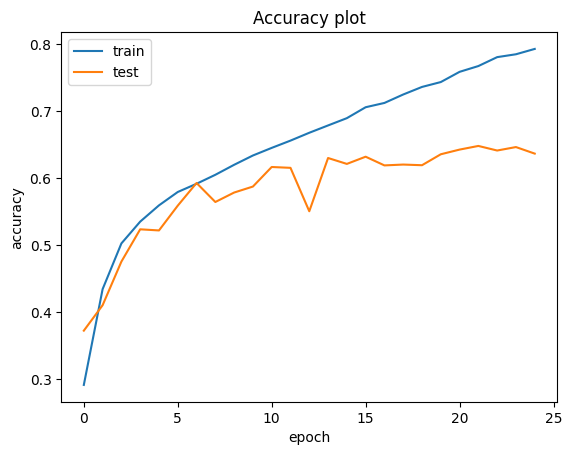

In [27]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("vgg19v2_accuracy.png")

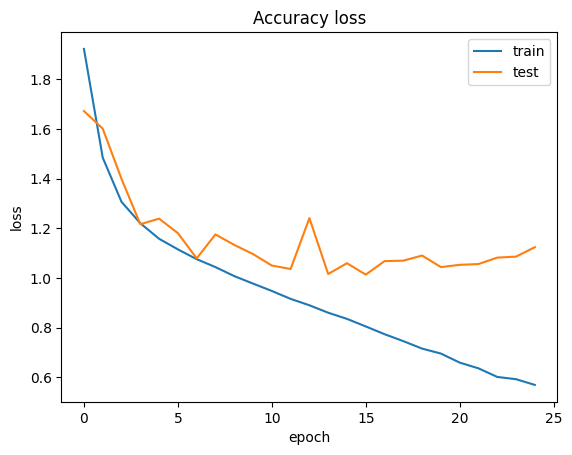

In [28]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("vgg19v2_loss.png")

In [29]:
model.save('final_model')

INFO:tensorflow:Assets written to: final_model\assets


INFO:tensorflow:Assets written to: final_model\assets


In [30]:
print(f"Train accuracy = {model.evaluate(train_generator ,batch_size=train_generator.batch_size,steps=train_generator.n // train_generator.batch_size)[1]*100}%")
print(f"Test accuracy = {model.evaluate(validation_generator ,batch_size=validation_generator.batch_size,steps=validation_generator.n // validation_generator.batch_size)[1]*100}%")

448/448 [==============================] - 233s 520ms/step - loss: 0.3407 - accuracy: 0.8893
Train accuracy = 88.93345594406128%
111/111 [==============================] - 54s 486ms/step - loss: 1.1159 - accuracy: 0.6423
Test accuracy = 64.23141956329346%


In [31]:
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

hist = model.fit(x=train_generator,
                  validation_data=validation_generator,
                  epochs=10,
                  steps_per_epoch=steps_per_epoch,
                  validation_steps=validation_steps)

Epoch 1/10
448/448 [==============================] - 1118s 2s/step - loss: 0.5522 - accuracy: 0.8008 - val_loss: 1.1138 - val_accuracy: 0.6446
Epoch 2/10
448/448 [==============================] - 1088s 2s/step - loss: 0.5249 - accuracy: 0.8092 - val_loss: 1.1056 - val_accuracy: 0.6484
Epoch 3/10
448/448 [==============================] - 1077s 2s/step - loss: 0.5011 - accuracy: 0.8183 - val_loss: 1.1232 - val_accuracy: 0.6485
Epoch 4/10
448/448 [==============================] - 1055s 2s/step - loss: 0.4932 - accuracy: 0.8201 - val_loss: 1.1893 - val_accuracy: 0.6350
Epoch 5/10
448/448 [==============================] - 1085s 2s/step - loss: 0.4681 - accuracy: 0.8300 - val_loss: 1.1485 - val_accuracy: 0.6533
Epoch 6/10
448/448 [==============================] - 1071s 2s/step - loss: 0.4636 - accuracy: 0.8336 - val_loss: 1.1695 - val_accuracy: 0.6457
Epoch 7/10
448/448 [==============================] - 1081s 2s/step - loss: 0.4375 - accuracy: 0.8409 - val_loss: 1.1765 - val_accuracy:

In [34]:
print(f"Train accuracy = {model.evaluate(train_generator ,batch_size=train_generator.batch_size,steps=train_generator.n // train_generator.batch_size)[1]*100}%")
print(f"Test accuracy = {model.evaluate(validation_generator ,batch_size=validation_generator.batch_size,steps=validation_generator.n // validation_generator.batch_size)[1]*100}%")

448/448 [==============================] - 250s 557ms/step - loss: 0.1461 - accuracy: 0.9593
Train accuracy = 95.92982530593872%
111/111 [==============================] - 63s 564ms/step - loss: 1.2442 - accuracy: 0.6402
Test accuracy = 64.02027010917664%


449/449 [==============================] - 233s 518ms/step
Confusion Matrix
[[ 586   65  567  997  657  686  437]
 [  62    5   62  113   83   58   53]
 [ 605   60  578 1017  718  634  485]
 [1053  103 1082 1788 1203 1208  778]
 [ 769   84  710 1222  827  819  534]
 [ 699   86  722 1178  847  749  549]
 [ 458   47  454  835  514  490  373]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.15      0.14      3995
     disgust       0.01      0.01      0.01       436
        fear       0.14      0.14      0.14      4097
       happy       0.25      0.25      0.25      7215
     neutral       0.17      0.17      0.17      4965
         sad       0.16      0.16      0.16      4830
    surprise       0.12      0.12      0.12      3171

    accuracy                           0.17     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.17      0.17     28709



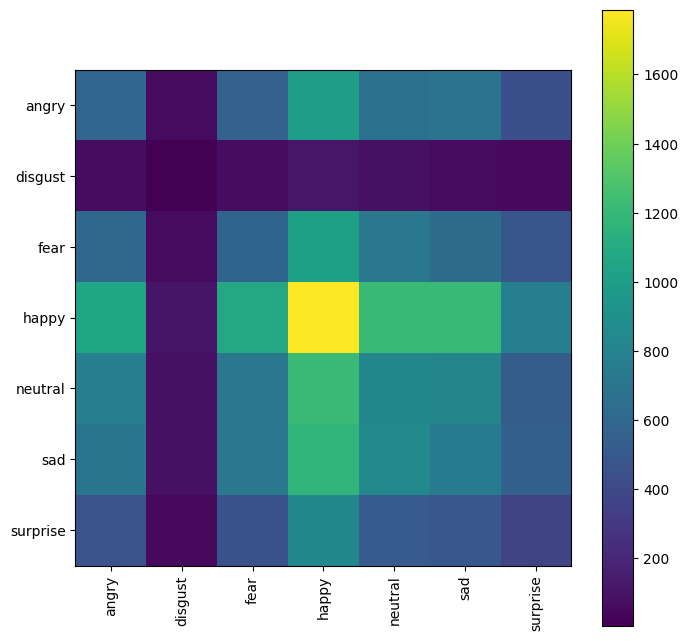

In [35]:
#Confusion Matrix on Train Dataset
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)
class_labels = validation_generator.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(train_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

112/112 [==============================] - 51s 451ms/step
Confusion Matrix
[[ 604    9   91   34   74  107   20]
 [  29   73    4    1    0    3    1]
 [ 140    6  531   24   84  165   74]
 [  62    5   54 1455   72   76   50]
 [ 149    2  103  101  658  203   17]
 [ 193    3  182   67  138  645   19]
 [  30    1   83   36   14   22  645]]
Classification Report
              precision    recall  f1-score   support

       angry       0.50      0.64      0.56       939
     disgust       0.74      0.66      0.70       111
        fear       0.51      0.52      0.51      1024
       happy       0.85      0.82      0.83      1774
     neutral       0.63      0.53      0.58      1233
         sad       0.53      0.52      0.52      1247
    surprise       0.78      0.78      0.78       831

    accuracy                           0.64      7159
   macro avg       0.65      0.64      0.64      7159
weighted avg       0.65      0.64      0.65      7159



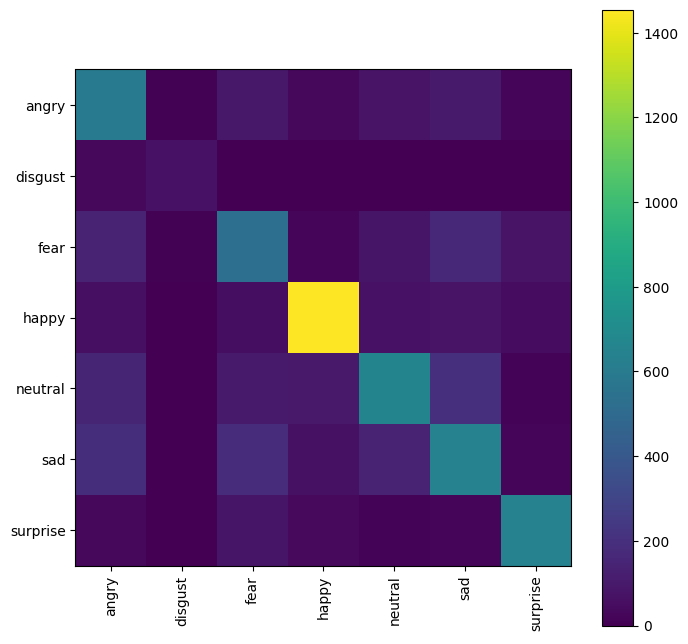

In [36]:
#Confusion Matrix on Test Dataset
y_pred = model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(validation_generator.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [11]:
model.load_weights('final_model')

In [12]:
x_test,y_test = next(validation_generator)
predict = model.predict(x_test)

2/2 [==============================] - 1s 375ms/step


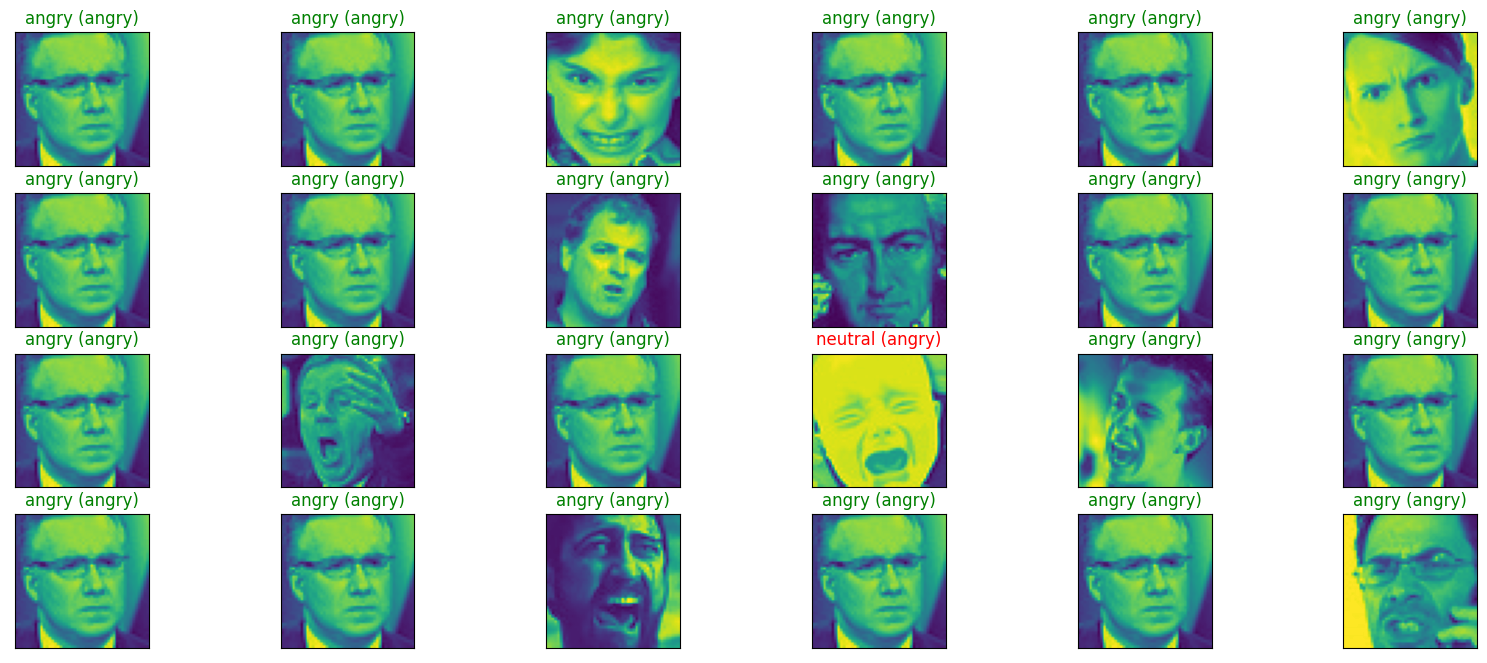

In [43]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
    index = min(index, 23)
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = class_labels[(np.argmax(predict[index]))]
    true_index = class_labels[(np.argmax(y_test[index]))]
    
    ax.set_title("{} ({})".format((predict_index), 
                                  (true_index)),
                                  color=("green" if predict_index == true_index else "red"))

In [19]:
def Prediction(image):
    plt.imshow(image,cmap='gray')
    plt.show()
    image = cv2.resize(image,(48,48))
    classes=['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
    img=np.array(image)
    img=img.reshape(1,48,48,1)
    predict_x=model.predict(img) 
    result=np.argmax(predict_x,axis=1)
    result[0]
    img_predict = classes[result[0]]
    return img_predict

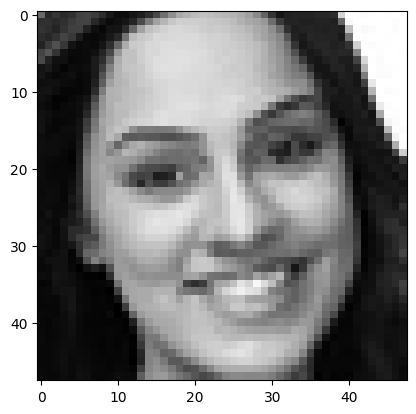

1/1 [==============================] - 0s 93ms/step
The person facial emotion is: Happy


In [24]:
image = cv2.imread('C:/Test/happy/PrivateTest_10613684.jpg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

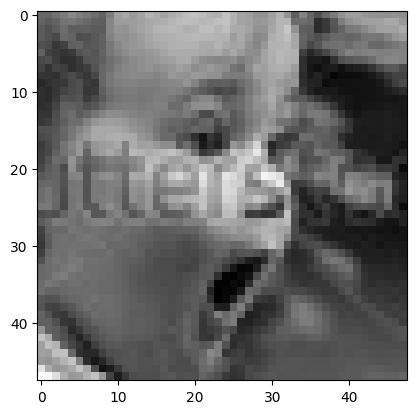

1/1 [==============================] - 0s 96ms/step
The person facial emotion is: Surprise


In [25]:
image = cv2.imread('C:/Test/surprise/PrivateTest_1076980.jpg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

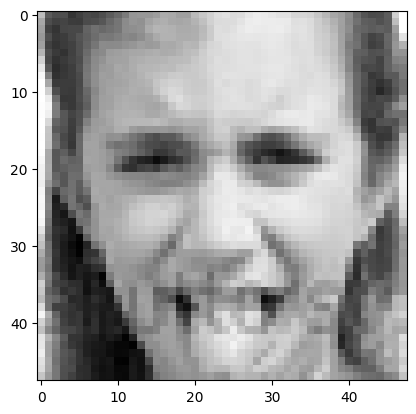

1/1 [==============================] - 0s 75ms/step
The person facial emotion is: Angry


In [50]:
image = cv2.imread('C:/Test/disgust/PrivateTest_85928336.jpg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

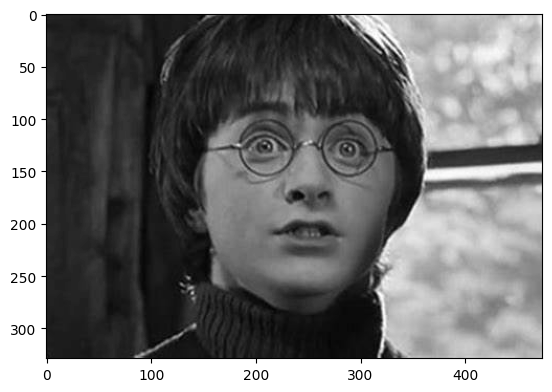

1/1 [==============================] - 0s 77ms/step
The person facial emotion is: Neutral


In [26]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/surprise.jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

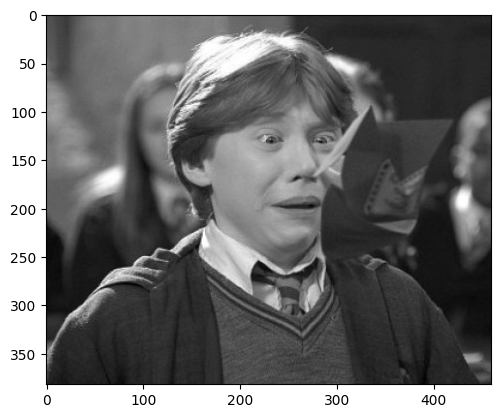

1/1 [==============================] - 0s 76ms/step
The person facial emotion is: Sad


In [27]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/R (7).jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

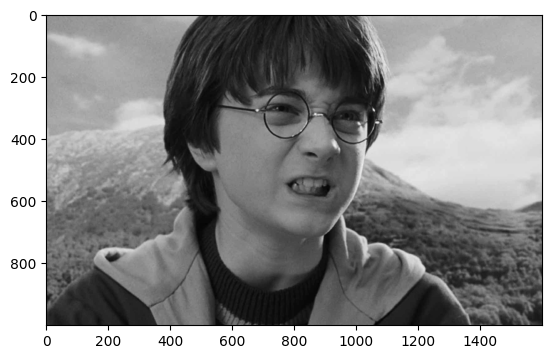

1/1 [==============================] - 0s 99ms/step
The person facial emotion is: Neutral


In [28]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/angray.jpg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

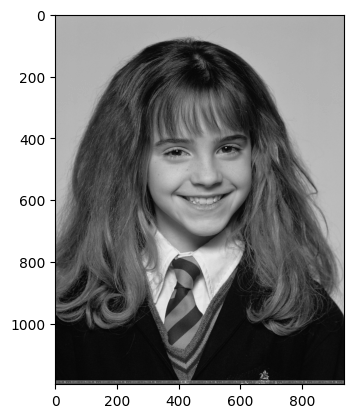

1/1 [==============================] - 0s 52ms/step
The person facial emotion is: Sad


In [29]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/happy.jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

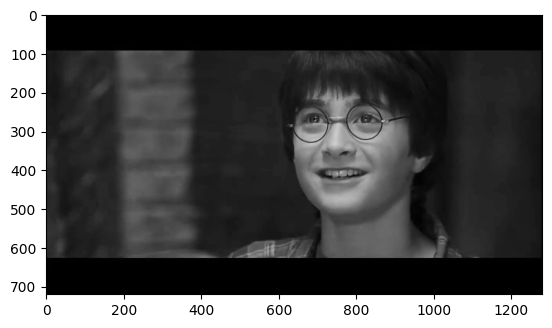

1/1 [==============================] - 0s 65ms/step
The person facial emotion is: Neutral


In [35]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/happy.jpg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

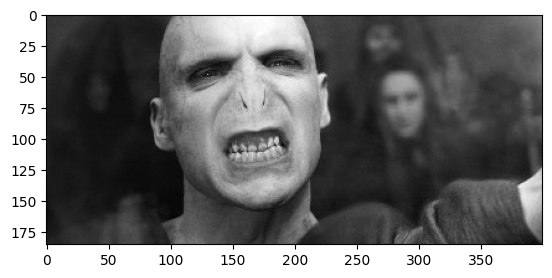

1/1 [==============================] - 0s 88ms/step
The person facial emotion is: Angry


In [38]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/R (4).jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

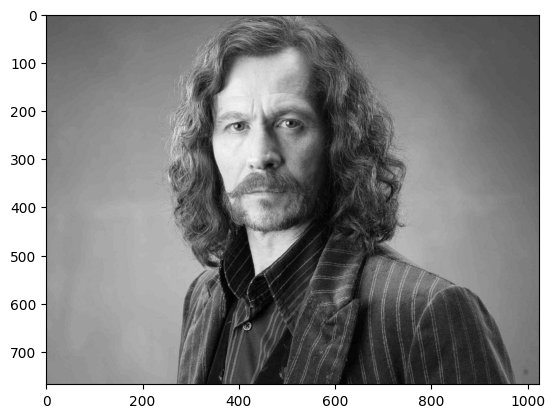

1/1 [==============================] - 0s 62ms/step
The person facial emotion is: Fear


In [39]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/R (5).jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

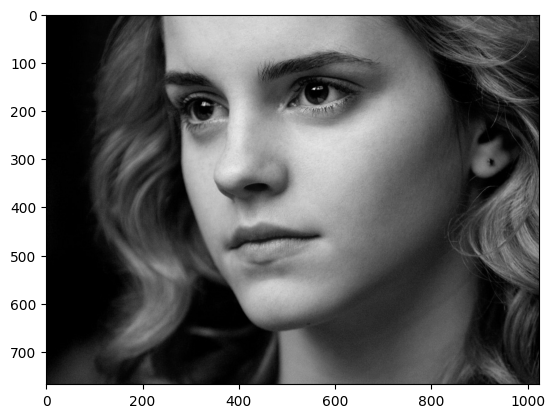

1/1 [==============================] - 0s 57ms/step
The person facial emotion is: Neutral


In [42]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/R.jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))

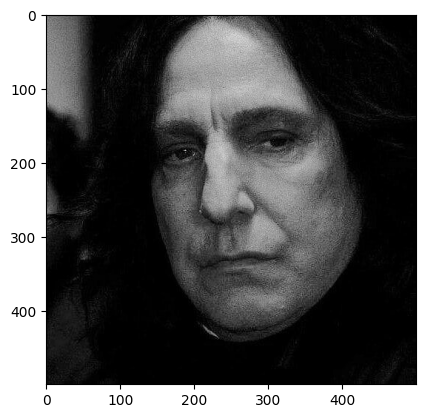

1/1 [==============================] - 0s 68ms/step
The person facial emotion is: Sad


In [47]:
image = cv2.imread('C:/Users/maria/Pictures/Screenshots/sad.jpeg',cv2.IMREAD_GRAYSCALE)
print('The person facial emotion is:',Prediction(image))